# Correlation of Data with MERRA2


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os
import matplotlib as mpl

In [3]:
import datetime as dt 
from dateutil import parser  # very usefull time format smart parser
import matplotlib.dates as mdates

In [4]:
object_name='HD14943'
infos='ctioNov2016'

In [5]:
OBS_NAME='CTIO'
MONTH_NAME='11'

In [6]:
logfile='logbk_'+object_name+'_'+infos+'.csv'

In [7]:
df_data=pd.read_csv(logfile)
df_data.index=df_data['date']

In [8]:
df_data

,Unnamed: 0,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
date,,,,,,,,,,,,
2016-11-23T01:45:29.665,0,1,1.101,2016-11-23T01:45:29.665,2016_11_23T01_45_51,20.0,24.718000,9.0,776.0,64.0,5.400000,1.522
2016-11-23T01:46:33.179,1,2,1.100,2016-11-23T01:46:33.179,2016_11_23T01_46_55,20.0,24.613001,9.0,776.0,64.0,6.600000,1.371
2016-11-23T01:47:36.699,2,3,1.099,2016-11-23T01:47:36.699,2016_11_23T01_47_58,20.0,24.509001,9.0,776.0,64.0,7.800000,1.399
2016-11-23T01:52:00.166,3,4,1.095,2016-11-23T01:52:00.166,2016_11_23T01_52_42,40.0,24.090000,8.9,776.0,64.0,5.000000,1.357
2016-11-23T01:53:23.679,4,5,1.094,2016-11-23T01:53:23.679,2016_11_23T01_54_05,40.0,23.961000,8.9,776.0,64.0,4.500000,1.304
2016-11-23T01:54:47.200,5,6,1.093,2016-11-23T01:54:47.200,2016_11_23T01_55_29,40.0,23.834000,9.0,776.0,64.0,6.000000,1.409
2016-11-23T02:26:40.568,6,7,1.075,2016-11-23T02:26:40.568,2016_11_23T02_27_22,40.0,21.587999,8.7,776.0,66.0,7.800000,1.713
2016-11-23T02:28:04.083,7,8,1.075,2016-11-23T02:28:04.083,2016_11_23T02_28_46,40.0,21.523001,8.7,776.0,66.0,10.000000,2.030
2016-11-23T02:29:27.596,8,9,1.074,2016-11-23T02:29:27.596,2016_11_23T02_30_09,40.0,21.459000,8.7,776.0,66.0,9.500000,2.288


In [9]:
all_dates=df_data["date"]

In [10]:
NDATA=len(all_dates)

In [11]:
all_dt= [ parser.parse(all_dates[i]) for i in range(NDATA)]

In [12]:
all_dt[:5]

[datetime.datetime(2016, 11, 23, 1, 45, 29, 665000),
 datetime.datetime(2016, 11, 23, 1, 46, 33, 179000),
 datetime.datetime(2016, 11, 23, 1, 47, 36, 699000),
 datetime.datetime(2016, 11, 23, 1, 52, 0, 166000),
 datetime.datetime(2016, 11, 23, 1, 53, 23, 679000)]

In [13]:
all_am=df_data["airmass"]

In [93]:
def PlotTimeSeries3(all_dt,data,label,ymin=0,ymax=1.):
    
    NDATA=len(data)
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot_date(all_dt, data,marker='o',color='red',lw=0,label=label,linewidth=3)

    ax.set_ylim(ymin,ymax)

    date_range = all_dt[NDATA-1] - all_dt[0]

    if date_range > dt.timedelta(days = 1):
        ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
        #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    else:
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_xaxis().set_minor_locator(mdates.MinLocator(bymin=range(0,60,5)))
    
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    ax.set_ylabel(label)
    ax.set_xlabel('time')
    ax.set_xlim(pd.to_datetime("2016-11-22"),pd.to_datetime("2016-11-27"))

    title= "Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('Atmopsheric Calibration work', y=1.02, fontsize=15)


    plt.title(title)
    plt.legend(loc='best')
    fig.autofmt_xdate()
    #plt.savefig(figfilename1, bbox_inches='tight')



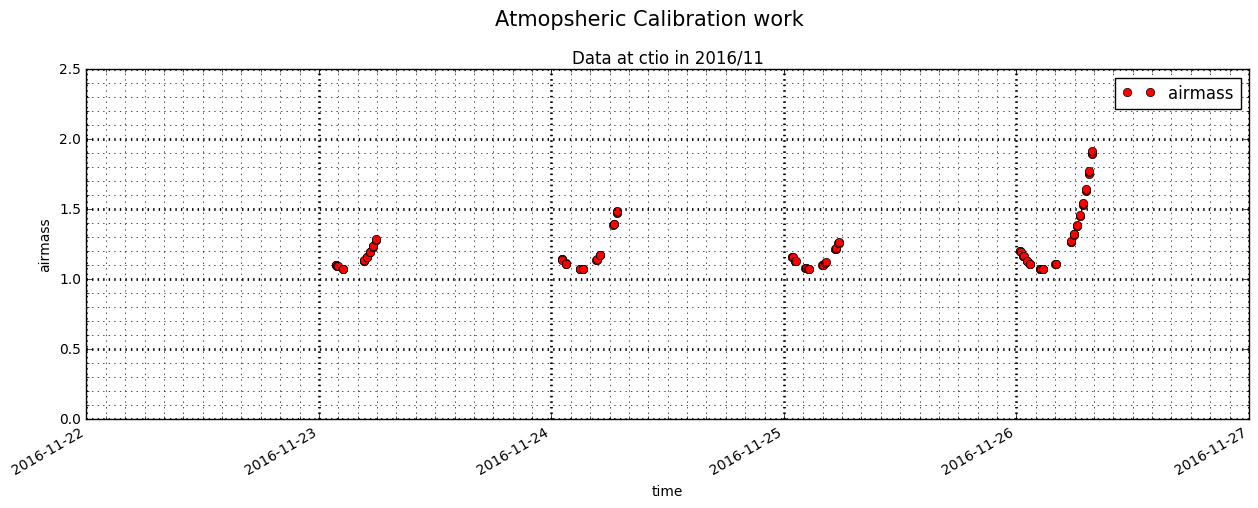

In [94]:
PlotTimeSeries3(all_dt,all_am,'airmass',ymin=0,ymax=2.5)

In [16]:
anaatm_file='AnaAtmFromSpectra_HD14943.csv'

In [17]:
df_anaatm=pd.read_csv(anaatm_file)

In [18]:
df_anaatm.index=df_anaatm['date']
#df.rename(columns={"date": "dateold", "H2O(1000nm)": ""})

In [19]:
df_anaatm

,date,H2O_1000nm,H2O_900nm,clouds
date,,,,
2016-11-23T01:45:29.665,2016-11-23T01:45:29.665,0.984579,0.929947,0.984999
2016-11-23T01:46:33.179,2016-11-23T01:46:33.179,0.922622,0.884434,0.970806
2016-11-23T01:47:36.699,2016-11-23T01:47:36.699,0.988803,0.934643,0.982378
2016-11-23T01:52:00.166,2016-11-23T01:52:00.166,0.993283,0.937588,0.985852
2016-11-23T01:53:23.679,2016-11-23T01:53:23.679,1.001153,0.948530,0.988074
2016-11-23T01:54:47.200,2016-11-23T01:54:47.200,0.983377,0.926409,0.981397
2016-11-23T02:26:40.568,2016-11-23T02:26:40.568,0.975621,0.915398,0.975784
2016-11-23T02:28:04.083,2016-11-23T02:28:04.083,0.854278,0.808419,0.949174
2016-11-23T02:29:27.596,2016-11-23T02:29:27.596,0.965339,0.907103,0.974038


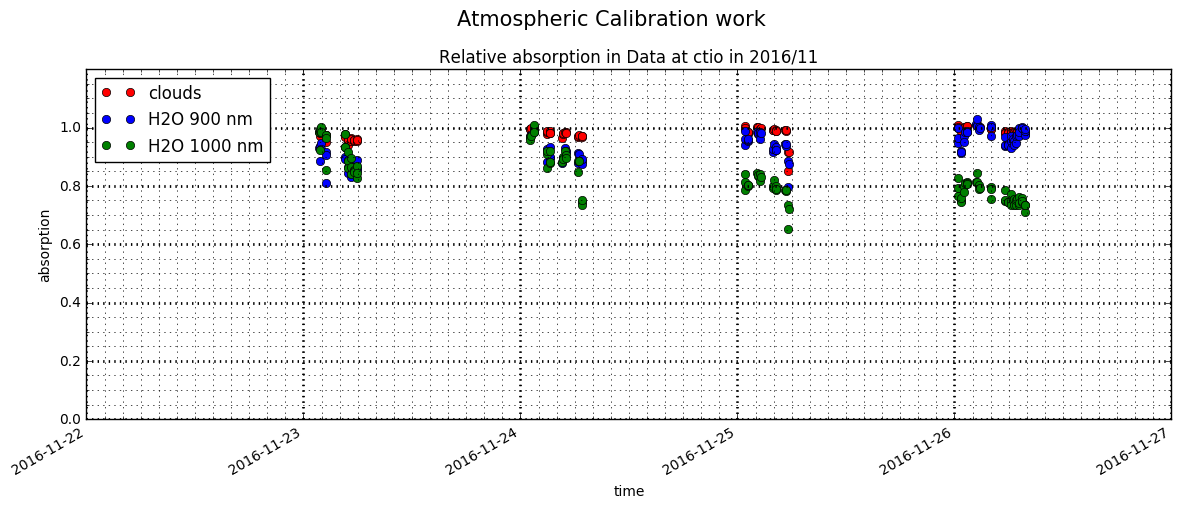

In [95]:
fig=plt.figure(figsize=(14,5))

ax=fig.add_subplot(1,1,1)
ax.plot_date(all_dt, df_anaatm["clouds"],marker='o',color='red',lw=0,label='clouds',linewidth=3)
ax.plot_date(all_dt, df_anaatm["H2O_900nm"],marker='o',color='blue',lw=0,label='H2O 900 nm',linewidth=3)
ax.plot_date(all_dt, df_anaatm["H2O_1000nm"],marker='o',color='green',lw=0,label='H2O 1000 nm',linewidth=3)

ax.set_ylim(0,1.2)

date_range = all_dt[NDATA-1] - all_dt[0]

if date_range > dt.timedelta(days = 1):
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
else:
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_xaxis().set_minor_locator(mdates.MinLocator(bymin=range(0,60,5)))
    
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.set_ylabel('absorption')
ax.set_xlabel('time')

ax.set_xlim(pd.to_datetime("2016-11-22"),pd.to_datetime("2016-11-27"))

title= "Relative absorption in Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
ax.set_title(title,fontsize=15)
fig.suptitle('Atmospheric Calibration work', y=1.02, fontsize=15)


plt.title(title)
plt.legend(loc='best')
fig.autofmt_xdate()

#plt.savefig(figfilename1, bbox_inches='tight')

In [21]:
mydate=df_data['date'][0]
print mydate

2016-11-23T01:45:29.665


In [22]:
NDATATIMES=len(df_data['date'])

In [23]:
pd.to_datetime(df_data['date'][0])

Timestamp('2016-11-23 01:45:29.665000')

### convert in format without T

In [24]:
new_date_format= [pd.to_datetime(df_data['date'][i]) for i in range(NDATATIMES)]

In [25]:
new_date_format[:5]

[Timestamp('2016-11-23 01:45:29.665000'),
 Timestamp('2016-11-23 01:46:33.179000'),
 Timestamp('2016-11-23 01:47:36.699000'),
 Timestamp('2016-11-23 01:52:00.166000'),
 Timestamp('2016-11-23 01:53:23.679000')]

## Merra2 Data

In [26]:
MONTH_NAME='11' # select november

In [27]:
# SELECT OBSERVATORY
OBS_NAME='ctio'

In [28]:
# The selected data field
DATA_NAME1 =  'tavg1_2d_csp_Nx_M2T1NXCSP'   # 
DATA_NAME2 =  'tavg1_2d_aer_Nx_M2T1NXAER'   # 
DATA_TAG1=['ISCCPCLDFRC','MDSH2OPATH','MDSICEPATH','MDSOPTHCKH2O','MDSOPTHCKICE','MDSOPTHCKTTL']
DATA_TAG2=['TOTANGSTR','TOTEXTTAU','TOTSCATAU']
DATA_TITLE1=['ISCCP Cloud area fraction',
            'MODIS H2O path',
            'MODIS ice path',
            'MODIS H2O optical thickness',
            'MODIS ice optical thickness',
            'MODIS total optical thickness'
           ]
DATA_TITLE2=['Total Aerosol Angstrom parameter 470-870 nm',
            'Total Aerosol Extinction AOT 550 nm',
            'Total Aerosol Scattering AOT 550 nm'
           ]

In [29]:
pandas_filename_csp='MERRA2_2016_'+DATA_NAME1+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'
pandas_filename_aer='MERRA2_2016_'+DATA_NAME2+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'

In [30]:
merra_csp=pd.read_csv(pandas_filename_csp)
merra_aer=pd.read_csv(pandas_filename_aer)

### remove NAN

In [31]:
#df.dropna()              #drop all rows that have any NaN values
#df.dropna(how='all')     #drop only if ALL columns are NaN
#df.dropna(how='all')     #drop only if ALL columns are NaN
#df.dropna(thresh=2)      #Drop row if it does not have at least two values that are **not** NaN
#df.dropna(subset=[1])   #Drop only if NaN in specific column (as asked in the question)

In [62]:
merra_csp=merra_csp.dropna(thresh=None)
merra_aer=merra_aer.dropna(thresh=None)

In [63]:
merra_csp

,time,ISCCPCLDFRC,MDSH2OPATH,MDSICEPATH,MDSOPTHCKH2O,MDSOPTHCKICE,MDSOPTHCKTTL
34,2016-11-02 10:30:00,0.659325,0.013834,0.031442,3.765675,9.198159,6.139584
522,2016-11-22 18:30:00,0.045950,0.045731,0.243331,70.214890,107.088463,66.064445
523,2016-11-22 19:30:00,0.048620,0.056294,0.150669,47.093456,98.927895,54.261208
524,2016-11-22 20:30:00,0.038881,0.020501,0.170857,27.371290,112.462334,58.961998
542,2016-11-23 14:30:00,0.090434,0.176962,0.000328,24.214966,3.579461,24.243380
543,2016-11-23 15:30:00,0.215577,0.193632,0.014040,22.081694,30.687281,22.125713
544,2016-11-23 16:30:00,0.267142,0.192901,0.010675,24.258883,17.770941,23.247322
545,2016-11-23 17:30:00,0.239928,0.342245,0.002749,35.523411,10.643081,34.621754
546,2016-11-23 18:30:00,0.227342,0.194569,0.005224,27.103806,21.391235,31.590002
594,2016-11-25 18:30:00,0.898132,0.003890,0.010839,37.582607,0.737772,1.662193


In [64]:
for thetime in merra_csp['time']:
    print thetime

2016-11-02 10:30:00
2016-11-22 18:30:00
2016-11-22 19:30:00
2016-11-22 20:30:00
2016-11-23 14:30:00
2016-11-23 15:30:00
2016-11-23 16:30:00
2016-11-23 17:30:00
2016-11-23 18:30:00
2016-11-25 18:30:00
2016-11-25 19:30:00
2016-11-26 10:30:00


In [65]:
new_csp_date_format= [pd.to_datetime(date) for date in merra_csp['time']]

In [66]:
new_aer_date_format= [pd.to_datetime(date) for date in merra_aer['time']]

In [56]:
def PlotMerraTimeSeries(all_dt,data,label,title,figfile='img.pdf'):
    
    NDATA=len(data)
    fig=plt.figure(figsize=(15,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot_date(all_dt, data,marker='o',color='red',lw=0,label=label,linewidth=1)

    #ax.set_ylim(ymin,ymax)

    date_range = all_dt[NDATA-1] - all_dt[0]

    if date_range > dt.timedelta(days = 1):
        ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        #ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
        #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    else:
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        #ax.get_xaxis().set_minor_locator(mdates.MinLocator(bymin=range(0,60,5)))
    
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    ax.set_ylabel(label)
    ax.set_xlabel('time')


    #title= "MERRA Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('Atmospheric Calibration work (at LAL)', y=1.02, fontsize=10)

    
    plt.title(title)
    plt.legend(loc='best')
    fig.autofmt_xdate()
    #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

    #plt.savefig(figfilename1, bbox_inches='tight')



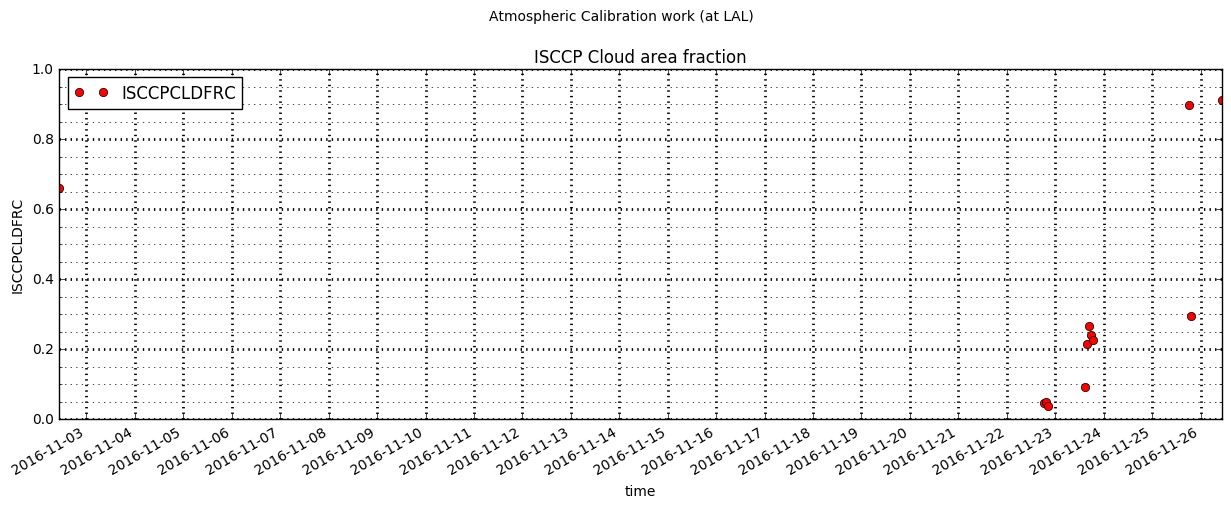

In [67]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[0]],DATA_TAG1[0],DATA_TITLE1[0],figfile='merraimg0.pdf')

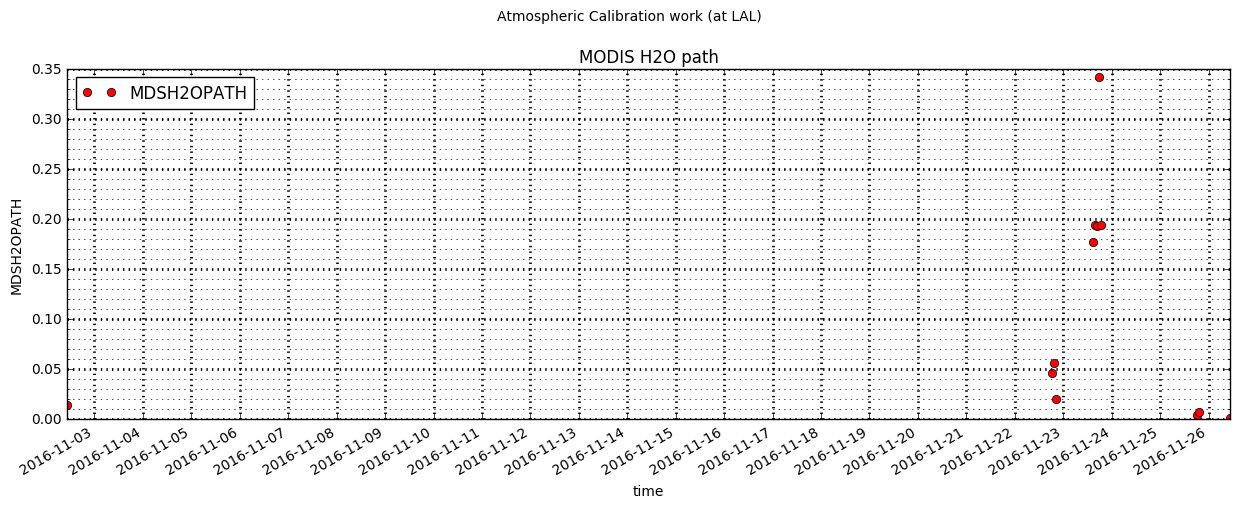

In [68]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[1]],DATA_TAG1[1],DATA_TITLE1[1],figfile='merraimg1.pdf')

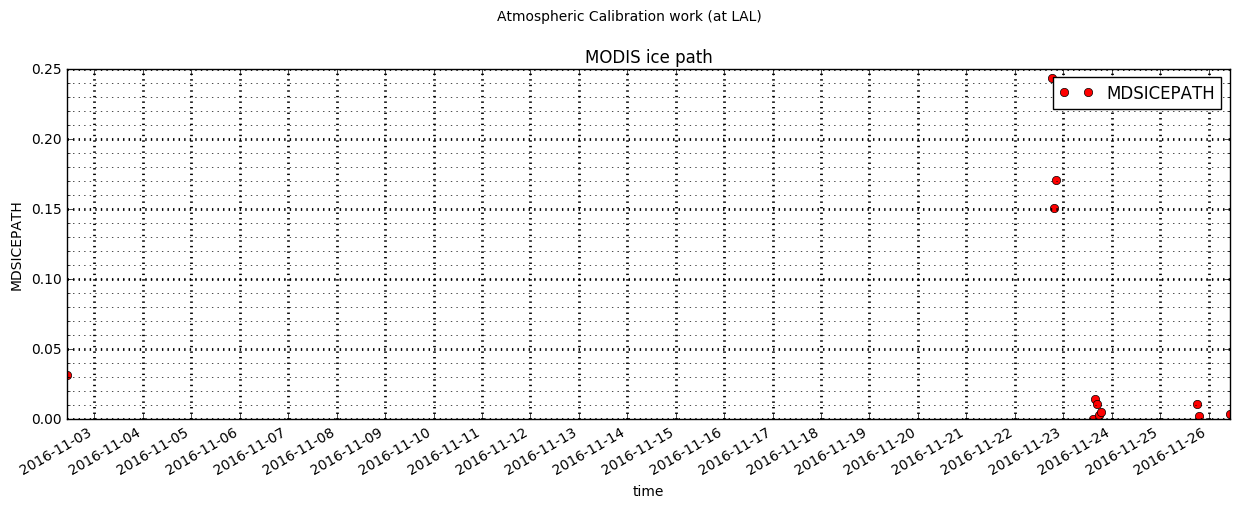

In [69]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[2]],DATA_TAG1[2],DATA_TITLE1[2],figfile='merraimg2.pdf')

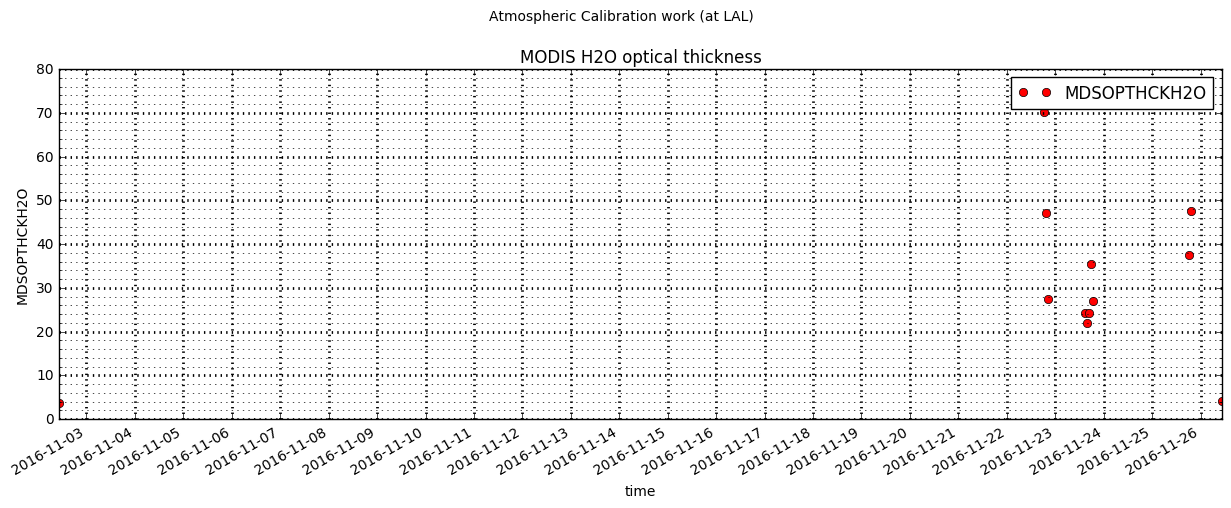

In [70]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[3]],DATA_TAG1[3],DATA_TITLE1[3],figfile='merraimg3.pdf')

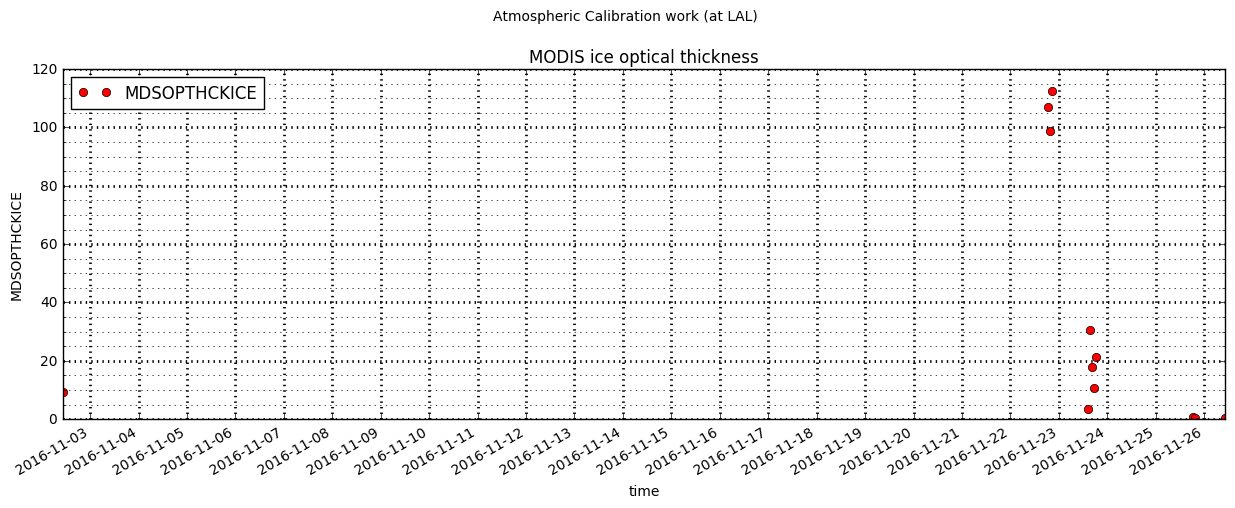

In [71]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[4]],DATA_TAG1[4],DATA_TITLE1[4],figfile='merraimg4.pdf')

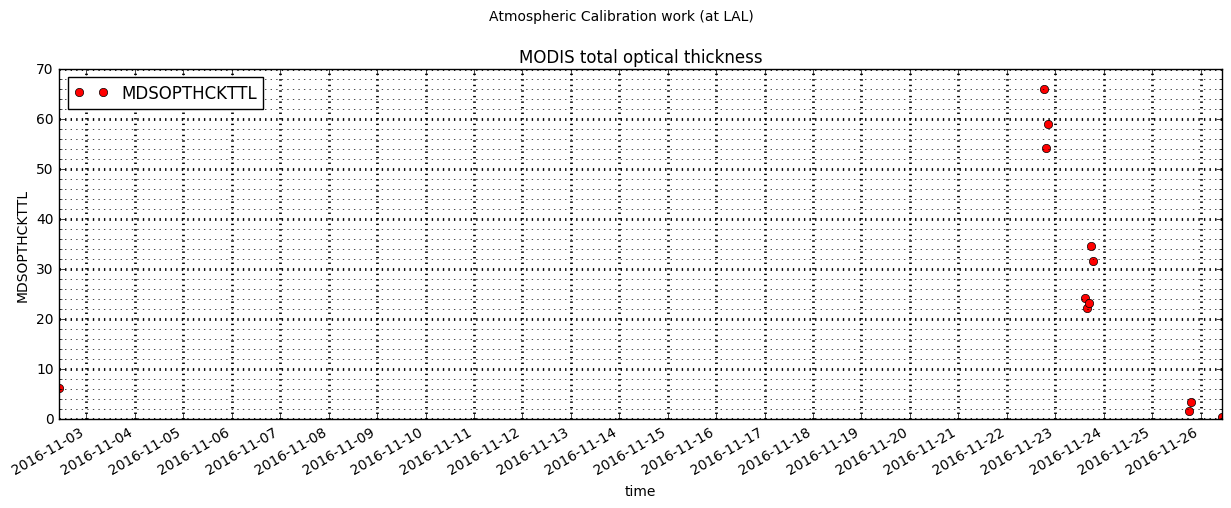

In [72]:
PlotMerraTimeSeries(new_csp_date_format,merra_csp[DATA_TAG1[5]],DATA_TAG1[5],DATA_TITLE1[5],figfile='merraimg5.pdf')

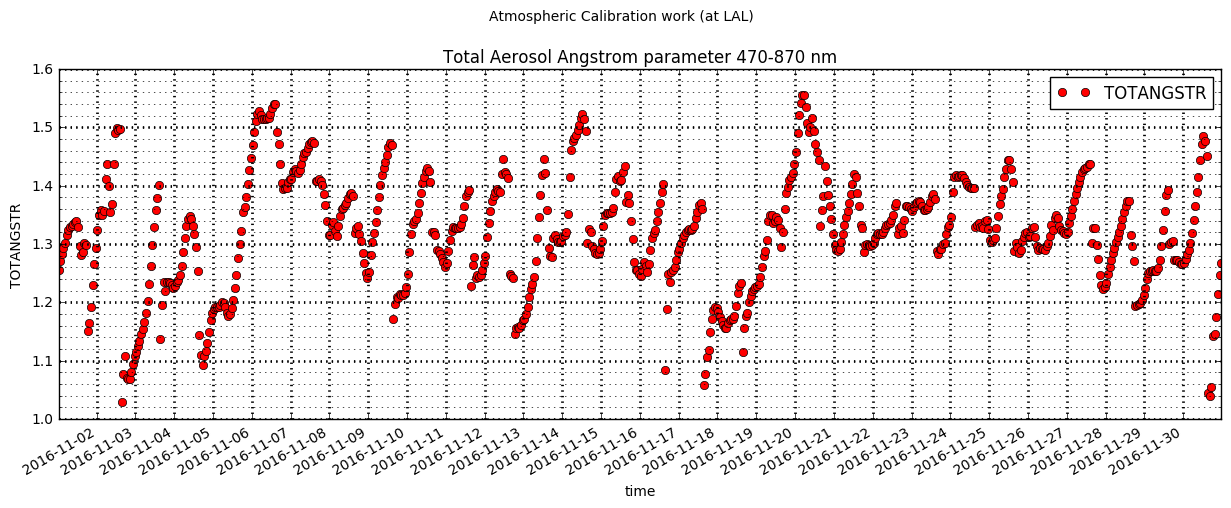

In [73]:
PlotMerraTimeSeries(new_aer_date_format,merra_aer[DATA_TAG2[0]],DATA_TAG2[0],DATA_TITLE2[0],figfile='merraimg6.pdf')

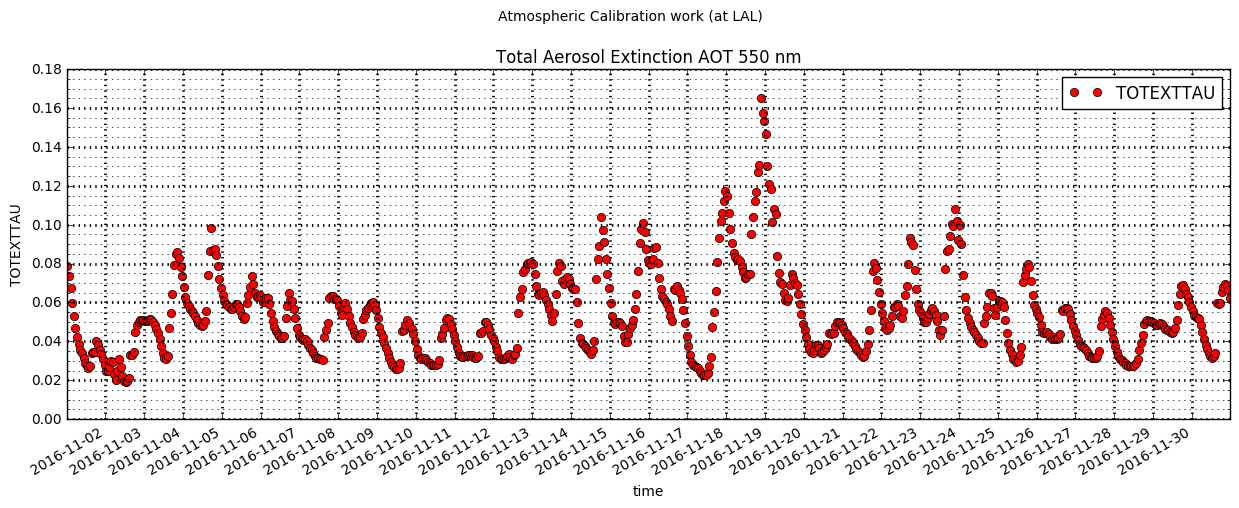

In [74]:
PlotMerraTimeSeries(new_aer_date_format,merra_aer[DATA_TAG2[1]],DATA_TAG2[1],DATA_TITLE2[1],figfile='merraimg7.pdf')

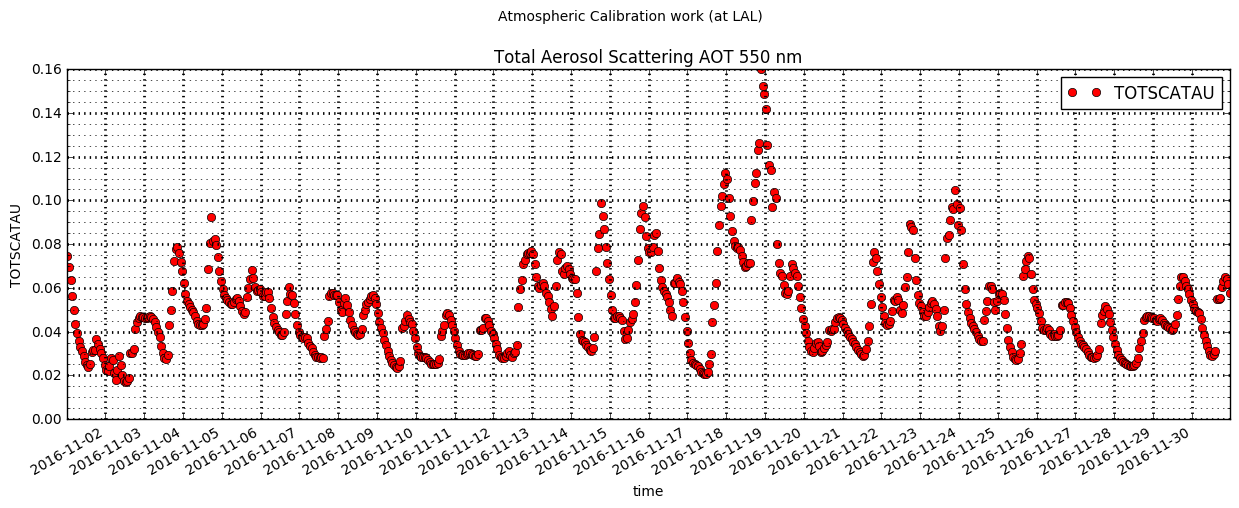

In [75]:
PlotMerraTimeSeries(new_aer_date_format,merra_aer[DATA_TAG2[2]],DATA_TAG2[2],DATA_TITLE2[2],figfile='merraimg8.pdf')

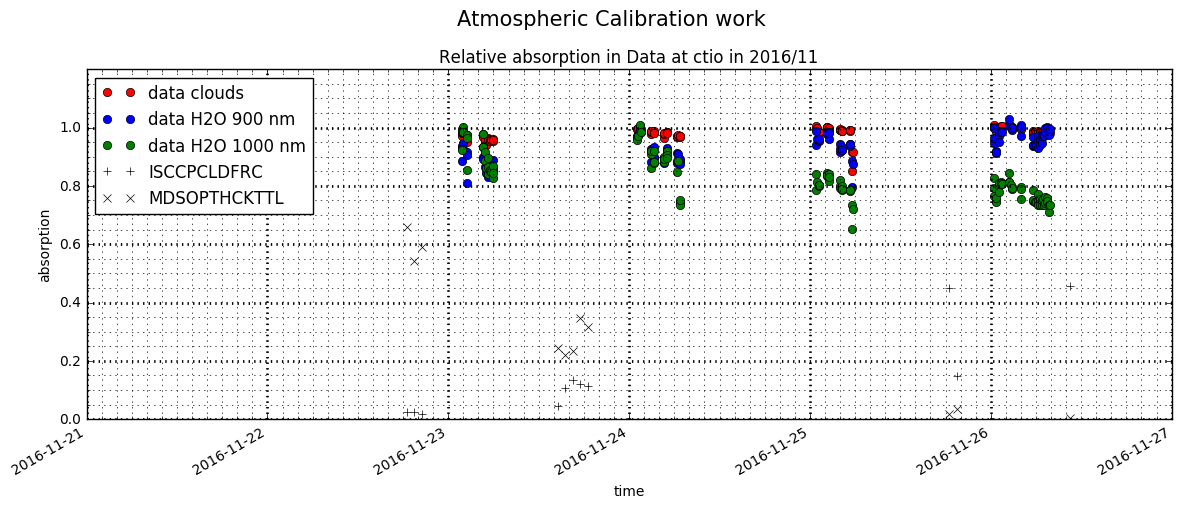

In [89]:
fig=plt.figure(figsize=(14,5))

ax=fig.add_subplot(1,1,1)
ax.plot_date(all_dt, df_anaatm["clouds"],marker='o',color='red',lw=0,label='data clouds',linewidth=3)
ax.plot_date(all_dt, df_anaatm["H2O_900nm"],marker='o',color='blue',lw=0,label='data H2O 900 nm',linewidth=3)
ax.plot_date(all_dt, df_anaatm["H2O_1000nm"],marker='o',color='green',lw=0,label='data H2O 1000 nm',linewidth=3)

ax.plot_date(new_csp_date_format,merra_csp[DATA_TAG1[0]]*0.5,marker='+',color='black',lw=2,label=DATA_TAG1[0],linewidth=3)
ax.plot_date(new_csp_date_format,merra_csp[DATA_TAG1[5]]*0.01,marker='x',color='black',lw=2,label=DATA_TAG1[5],linewidth=3)

ax.set_ylim(0,1.2)

date_range = all_dt[NDATA-1] - all_dt[0]

if date_range > dt.timedelta(days = 1):
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
else:
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_xaxis().set_minor_locator(mdates.MinLocator(bymin=range(0,60,5)))
    
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.set_ylabel('absorption')
ax.set_xlabel('time')
#ax.set_xlim(all_dt[0],all_dt[NDATA-1])
ax.set_xlim(pd.to_datetime("2016-11-21"),pd.to_datetime("2016-11-27"))

title= "Relative absorption in Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
ax.set_title(title,fontsize=15)
fig.suptitle('Atmospheric Calibration work', y=1.02, fontsize=15)


plt.title(title)
plt.legend(loc='best')
fig.autofmt_xdate()

#plt.savefig(figfilename1, bbox_inches='tight')